<a href="https://colab.research.google.com/github/Snehkrishnan/Deep-Learning/blob/main/digit_recgnizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.8826 - loss: 0.3915 - val_accuracy: 0.9817 - val_loss: 0.0583
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9834 - loss: 0.0546 - val_accuracy: 0.9867 - val_loss: 0.0460
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9898 - loss: 0.0338 - val_accuracy: 0.9900 - val_loss: 0.0358
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9931 - loss: 0.0234 - val_accuracy: 0.9900 - val_loss: 0.0391
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9946 - loss: 0.0173 - val_accuracy: 0.9897 - val_loss: 0.0398
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9884 - loss: 0.0366


Test accuracy: 0.9906


Saving 4.jpg to 4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


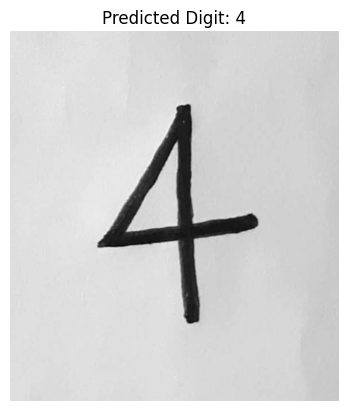

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
import cv2
from matplotlib import pyplot as plt

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 3. Build the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
model.fit(x_train, y_train,
          epochs=5,
          batch_size=64,
          validation_split=0.1)

# 6. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# 7. Save model
model.save("mnist_model.h5")

# 8. Upload custom image
uploaded = files.upload()

# 9. Preprocessing function
def load_and_preprocess_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Invert if background is white
    img = 255 - img

    # Normalize to [0, 1]
    img = img.astype('float32') / 255.0

    # Reshape for model: (1, 28, 28, 1)
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)
    return img

# 10. Load and predict
model = load_model("mnist_model.h5")
image_path = list(uploaded.keys())[0]
img = load_and_preprocess_image(image_path)
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

# 11. Display result
plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()


In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [3]:
# 🛠 Create the app.py file inside Colab

%%writefile app.py
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image

# Title
st.title("🧠 MNIST Digit Recognizer")
st.write("Upload a handwritten digit image (28x28 or larger) and get the prediction!")

# Load model
@st.cache_resource
def load_mnist_model():
    return load_model("mnist_model.h5")

model = load_mnist_model()

# Preprocess image
def preprocess_image(image):
    # Convert to grayscale
    image = image.convert('L')
    image = np.array(image)

    # Resize to 28x28
    image = cv2.resize(image, (28, 28))

    # Invert colors if background is white
    if np.mean(image) > 127:
        image = 255 - image

    # Normalize and reshape
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=(0, -1))  # (1, 28, 28, 1)
    return image

# Upload image
uploaded_file = st.file_uploader("Upload an image...", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    if st.button("Predict"):
        processed_img = preprocess_image(image)
        prediction = model.predict(processed_img)
        predicted_digit = np.argmax(prediction)
        st.success(f"Predicted Digit: {predicted_digit}")

Overwriting app.py
